# Python for data analysis project - BOCQUIN Victor, BROSSEAU Alexandre, COGORDAN Alexandre

In [362]:
import pandas as pd
import numpy as np

### Parameters to change for experimentation
Choose the options at the start and compare the results of the model - only do on gradient boosting our chosen model

In [363]:
featuresSelection = True
testSize = 0.3
number_of_features=10

## Data pre-processing 

#### This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.


In [364]:
df = pd.read_csv('diabetic_data.csv', sep = ',')
pd.set_option('display.max_columns',None)

In [365]:
df["health_index"] = df.apply(lambda x: x.number_emergency + x.number_inpatient + x.number_outpatient, axis = 1)
df["severity_of_disease"] = df.apply(lambda x: x.time_in_hospital + x.num_procedures + x.num_medications + x.num_lab_procedures + x.number_diagnoses, axis = 1)

In [366]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,health_index,severity_of_disease
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,1.202759,72.275809
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,2.291781,25.571414
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,56.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,72.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,2.000000,89.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,80.000000,200.000000


#### We're removing rows for which the columns diag1, diag2 and diag3 have missing values

In [367]:
df.isnull()



drop_Idx = set(df[(df['diag_1'] == '?') & (
    df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(
    set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

In [368]:
df = df.replace('?', np.nan)


In [369]:

df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,89
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3,37
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,70
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,65
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,0,79
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,1,68
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,1,76
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1,87


In [370]:
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.loc[missing_value_df['percent_missing']>2]

,column_name,percent_missing
weight,weight,96.892562
payer_code,payer_code,39.683346
medical_specialty,medical_specialty,49.275242


#### We've removed the weight feature considering it has a lot of missing values

In [371]:
df = df.drop(columns = ['weight'])

In [372]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,89
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3,37
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,70
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,65
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,0,65


#### We've converted the age range to a singular value (int) so that it will be easier to interpret in our future model.

In [373]:
age_values_to_num = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : age_values_to_num[x])

In [374]:
df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch' else -1)

df['diabetesMed'] = df['diabetesMed'].apply(lambda x : -1 if x == 'No' else 1)


df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [375]:
dico_rep = {"High_frequency" : ['InternalMedicine', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Urology','ObstetricsandGynecology','Psychiatry','Pulmonology ','Nephrology','Radiologist'],
            "Low_frequency" : ['Surgery-PlasticwithinHeadandNeck','Psychiatry-Addictive','Proctology','Dermatology','SportsMedicine','Speech','Perinatology','Neurophysiology','Resident','Pediatrics-Hematology-Oncology','Pediatrics-EmergencyMedicine','Dentistry','DCPTEAM','Psychiatry-Child/Adolescent','Pediatrics-Pulmonology','Surgery-Pediatric','AllergyandImmunology','Pediatrics-Neurology','Anesthesiology','Pathology','Cardiology-Pediatric','Endocrinology-Metabolism','PhysicianNotFound','Surgery-Colon&Rectal','OutreachServices','Surgery-Maxillofacial','Rheumatology','Anesthesiology-Pediatric','Obstetrics','Obsterics&Gynecology-GynecologicOnco'],
            "Pediatrics" : ['Pediatrics','Pediatrics-AllergyandImmunology','Pediatrics-InfectiousDiseases','Pediatrics-CriticalCare','Pediatrics-EmergencyMedicine','Pediatrics-Endocrinology','Pediatrics-Hematology-Oncology','Pediatrics-Neurology','Pediatrics-Pulmonology', 'Anesthesiology-Pediatric', 'Cardiology-Pediatric', 'Surgery-Pediatric'],
            "Psychic" : ['Psychiatry-Addictive', 'Psychology', 'Psychiatry',  'Psychiatry-Child/Adolescent', 'PhysicalMedicineandRehabilitation', 'Osteopath'],
            "Neurology" : ['Neurology', 'Surgery-Neuro',  'Pediatrics-Neurology', 'Neurophysiology'],
            "Surgery" : ['Surgeon', 'Surgery-Cardiovascular','Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Plastic', 'Surgery-PlasticwithinHeadandNeck',  'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty', 'Podiatry'],
            "Ungrouped" : ['Endocrinology','Gastroenterology','Gynecology','Hematology','Hematology/Oncology','Hospitalist','InfectiousDiseases','Oncology','Ophthalmology','Otolaryngology','Pulmonology','Radiology'],
            "None" : 'None'
}

In [376]:
#df.medical_specialty = df.medical_specialty.fillna("None")
#len(dico_rep["Pediatrics"]) + len(dico_rep["High_frequency"]) + len(dico_rep["Low_frequency"]) + len(dico_rep["Psychic"]) + len(dico_rep["Neurology"]) + len(dico_rep["Surgery"]) + len(dico_rep["Surgery"]) + len(dico_rep["Ungrouped"]) + len(dico_rep["None"]) 
#len(df.medical_specialty.unique())

In [377]:
df.medical_specialty = df.medical_specialty.fillna('None')
df.payer_code = df.payer_code.fillna('None')

new_medical_specialty = []

for value in df.medical_specialty:
    found = False;
    for key, values in dico_rep.items():
        if(value in values and found == False):
            found = True;
            new_medical_specialty.append(key)

df = df.drop("medical_specialty", axis = 1)
df = df.assign(medical_specialty = new_medical_specialty)


#### We're removing the citoglipton and examide features since we cannot get any interpretive information frmo this data considering they only have one unique value 

In [378]:
df.drop(['citoglipton', 'examide'], axis = 1)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease,medical_specialty
1,149190,55629189,Caucasian,Female,15,1,1,7,3,None,59,0,18,0,0,0,276,250.01,255,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,>30,0,89,None
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,None,11,5,13,2,0,1,648,250,V27,6,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,-1,1,NO,3,37,None
3,500364,82442376,Caucasian,Male,35,1,1,7,2,None,44,1,16,0,0,0,8,250.43,403,7,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,1,1,NO,0,70,None
4,16680,42519267,Caucasian,Male,45,1,1,7,1,None,51,0,8,0,0,0,197,157,250,5,0,0,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,1,1,NO,0,65,None
5,35754,82637451,Caucasian,Male,55,2,1,2,3,None,31,6,16,0,0,0,414,411,250,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,-1,1,>30,0,65,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,MC,51,0,16,0,0,0,250.13,291,458,9,0,8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,1,1,>30,0,79,None
101762,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,MC,33,3,18,0,0,1,560,276,787,9,0,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,-1,1,NO,1,68,None
101763,443854148,41088789,Caucasian,Male,75,1,1,7,1,MC,53,0,9,1,0,0,38,590,296,13,0,0,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,1,1,NO,1,76,None
101764,443857166,31693671,Caucasian,Female,85,2,3,7,10,MC,45,2,21,0,0,1,996,285,998,9,0,0,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,Up,No,No,No,No,No,1,1,NO,1,87,High_frequency


### Feature Cleanse

In [379]:
df = df.drop(['encounter_id'], axis = 1) # There is no need to keep the encounter_id since it gives information about an encounter which could be incremented by the same person. We are more concerned about the patient number which is unique

In [380]:
pd.set_option('display.max_columns', None)

In [381]:
df.drop(df[(df.discharge_disposition_id == 11) | (df.discharge_disposition_id == 13) | (df.discharge_disposition_id == 14) | (df.discharge_disposition_id == 19) | 
(df.discharge_disposition_id == 20) | (df.discharge_disposition_id == 21)].index, inplace=True)

###### We've removed the values 11,13,14,19,20 and 21 from the dataframe considering they relate to death and hospice meaning that the patients cannot be readmitted.

### Final encoding

In [382]:
df.payer_code.fillna("Unknown")

race_encoding = {"Caucasian" : 0, 'AfricanAmerican' : 1, 'Asian' : 2, 'Hispanic' : 3, 'Other' : 4}
gender_encoding = {'Female': 0, 'Male' : 1}
payer_code_encoding = {'Unknown' : 0, 'None': 1, 'MC' : 2, 'MD' : 3, 'HM' : 4, 'UN' : 5, 'BC' : 6, 'SP' : 7, 'CP' : 8, 'SI' : 9, 'DM' : 10, 'CM' : 11, 'CH' : 12, 'PO' : 13, 'WC' : 14, 'OT' : 15, 'OG' : 16, 'MP' : 17}
medical_specialty_encoding = {'None' : 0, 'High_frequency' : 1, 'Ungrouped' : 2, 'Surgery' : 3, 'Neurology' : 4, 'Low_frequency' : 5, 'Pediatrics' : 6, 'Psychic' : 7}
readmitted_encoding = {'>30': 0, '<30': 0, 'NO': 1}
medicine_encoding = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
diag_1_encoding = {'Other' : 0, 'Circulatory' : 1, 'Respiratory' : 2, 'Digestive' : 3, 'Diabetes' : 4, 'Injury' : 5, 'Musculoskeletal' : 6 , 'Genitourinary' : 7, 'Neoplasms' : 8, 'Pregnancy' : 9}

df_encoded = df.copy()

df_encoded = df_encoded.replace({"race" : race_encoding})
df_encoded = df_encoded.replace({"gender" : gender_encoding})
df_encoded = df_encoded.replace({"payer_code" : payer_code_encoding})
df_encoded = df_encoded.replace({"medical_specialty" : medical_specialty_encoding})
df_encoded = df_encoded.replace({"readmitted" : readmitted_encoding})


for i in df_encoded.columns[22:45]:
    df_encoded = df_encoded.replace({i : medicine_encoding})


We'll also change the negative values for change and diabetes medicines so that we can use feature selection on them (the chi2 method does not work on negative values)

In [383]:
change_diabetesMed_encoding = {-1 : 0, 1 : 1}

df_encoded = df_encoded.replace({"change": change_diabetesMed_encoding})
df_encoded = df_encoded.replace({"diabetesMed": change_diabetesMed_encoding})


### Further analysis - data calculation analysis and confusion matrix

In [384]:
df.describe()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,health_index,severity_of_disease
count,9.567200e+04,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000,95672.000000
mean,5.479114e+07,66.039489,2.032172,3.552450,5.753157,4.405155,42.956246,1.345577,16.078278,0.376369,0.203132,0.642278,7.492913,9.096705,1.150378,-0.071703,0.541391,1.221779,72.278169
std,3.870214e+07,15.591297,1.451098,5.214069,4.072608,2.976088,19.646308,1.705682,8.074730,1.281372,0.950447,1.268598,1.839197,42.877977,2.619305,0.997431,0.840775,2.317482,25.423977
min,1.350000e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,8.000000
25%,2.347318e+07,55.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,56.000000
50%,4.677479e+07,65.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,72.000000
75%,8.804296e+07,75.000000,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,1.000000,2.000000,88.000000
max,1.895026e+08,95.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,300.000000,8.000000,1.000000,1.000000,80.000000,200.000000


Text(0.5, 1.0, 'Correlation between each category in the dataframe')

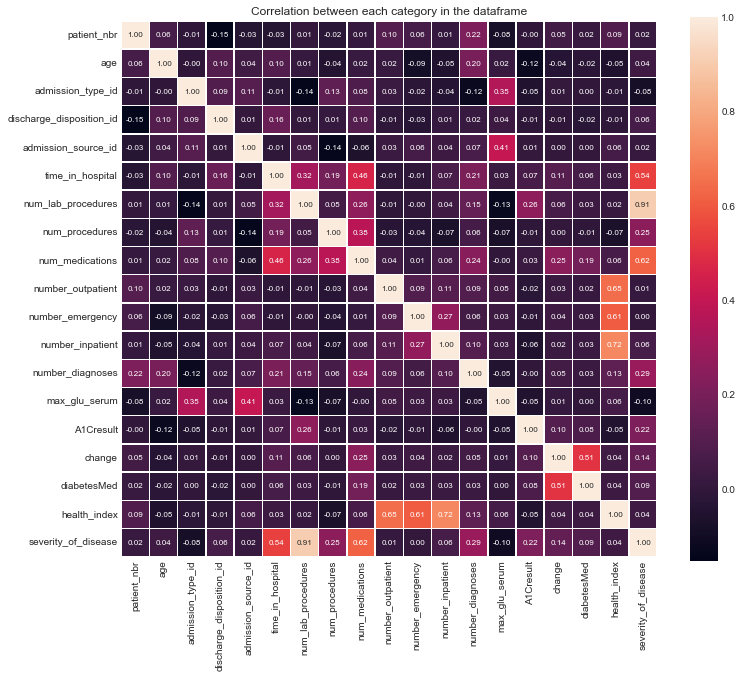

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', square=True, annot_kws={"size": 35 / np.sqrt(len(df.corr()))})
plt.title('Correlation between each category in the dataframe')


#### Correlation matrix where the correlation is higher than 0.3  

Text(0.5, 1.0, 'Correlation between each category in the dataframe')

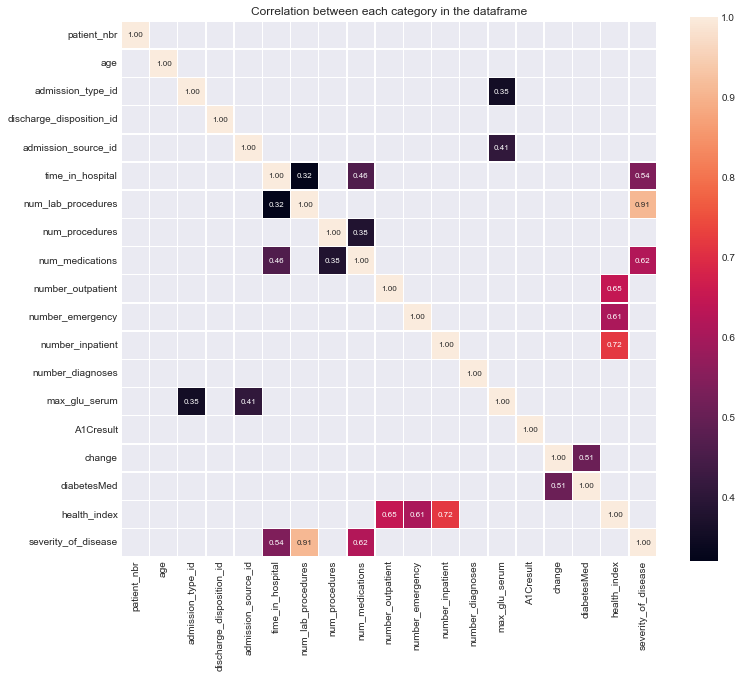

In [386]:
plt.figure(figsize=(12,10))
corr = df.corr()
corrLimitationOne = corr[corr>= 0.3]
corrLimitationOne

sns.heatmap(corrLimitationOne, annot = True, linewidths = .5, fmt = '.2f', square = True, annot_kws={"size": 35 / np.sqrt(len(df.corr()))})

plt.title('Correlation between each category in the dataframe')

## Data visualisation

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt

rea = df['readmitted']
rea = rea.replace('>30', 0)
rea = rea.replace('<30', 1)
rea = rea.replace('NO', 0)

#sns.countplot(df['readmitted']).set_title('Distribution of readmission')


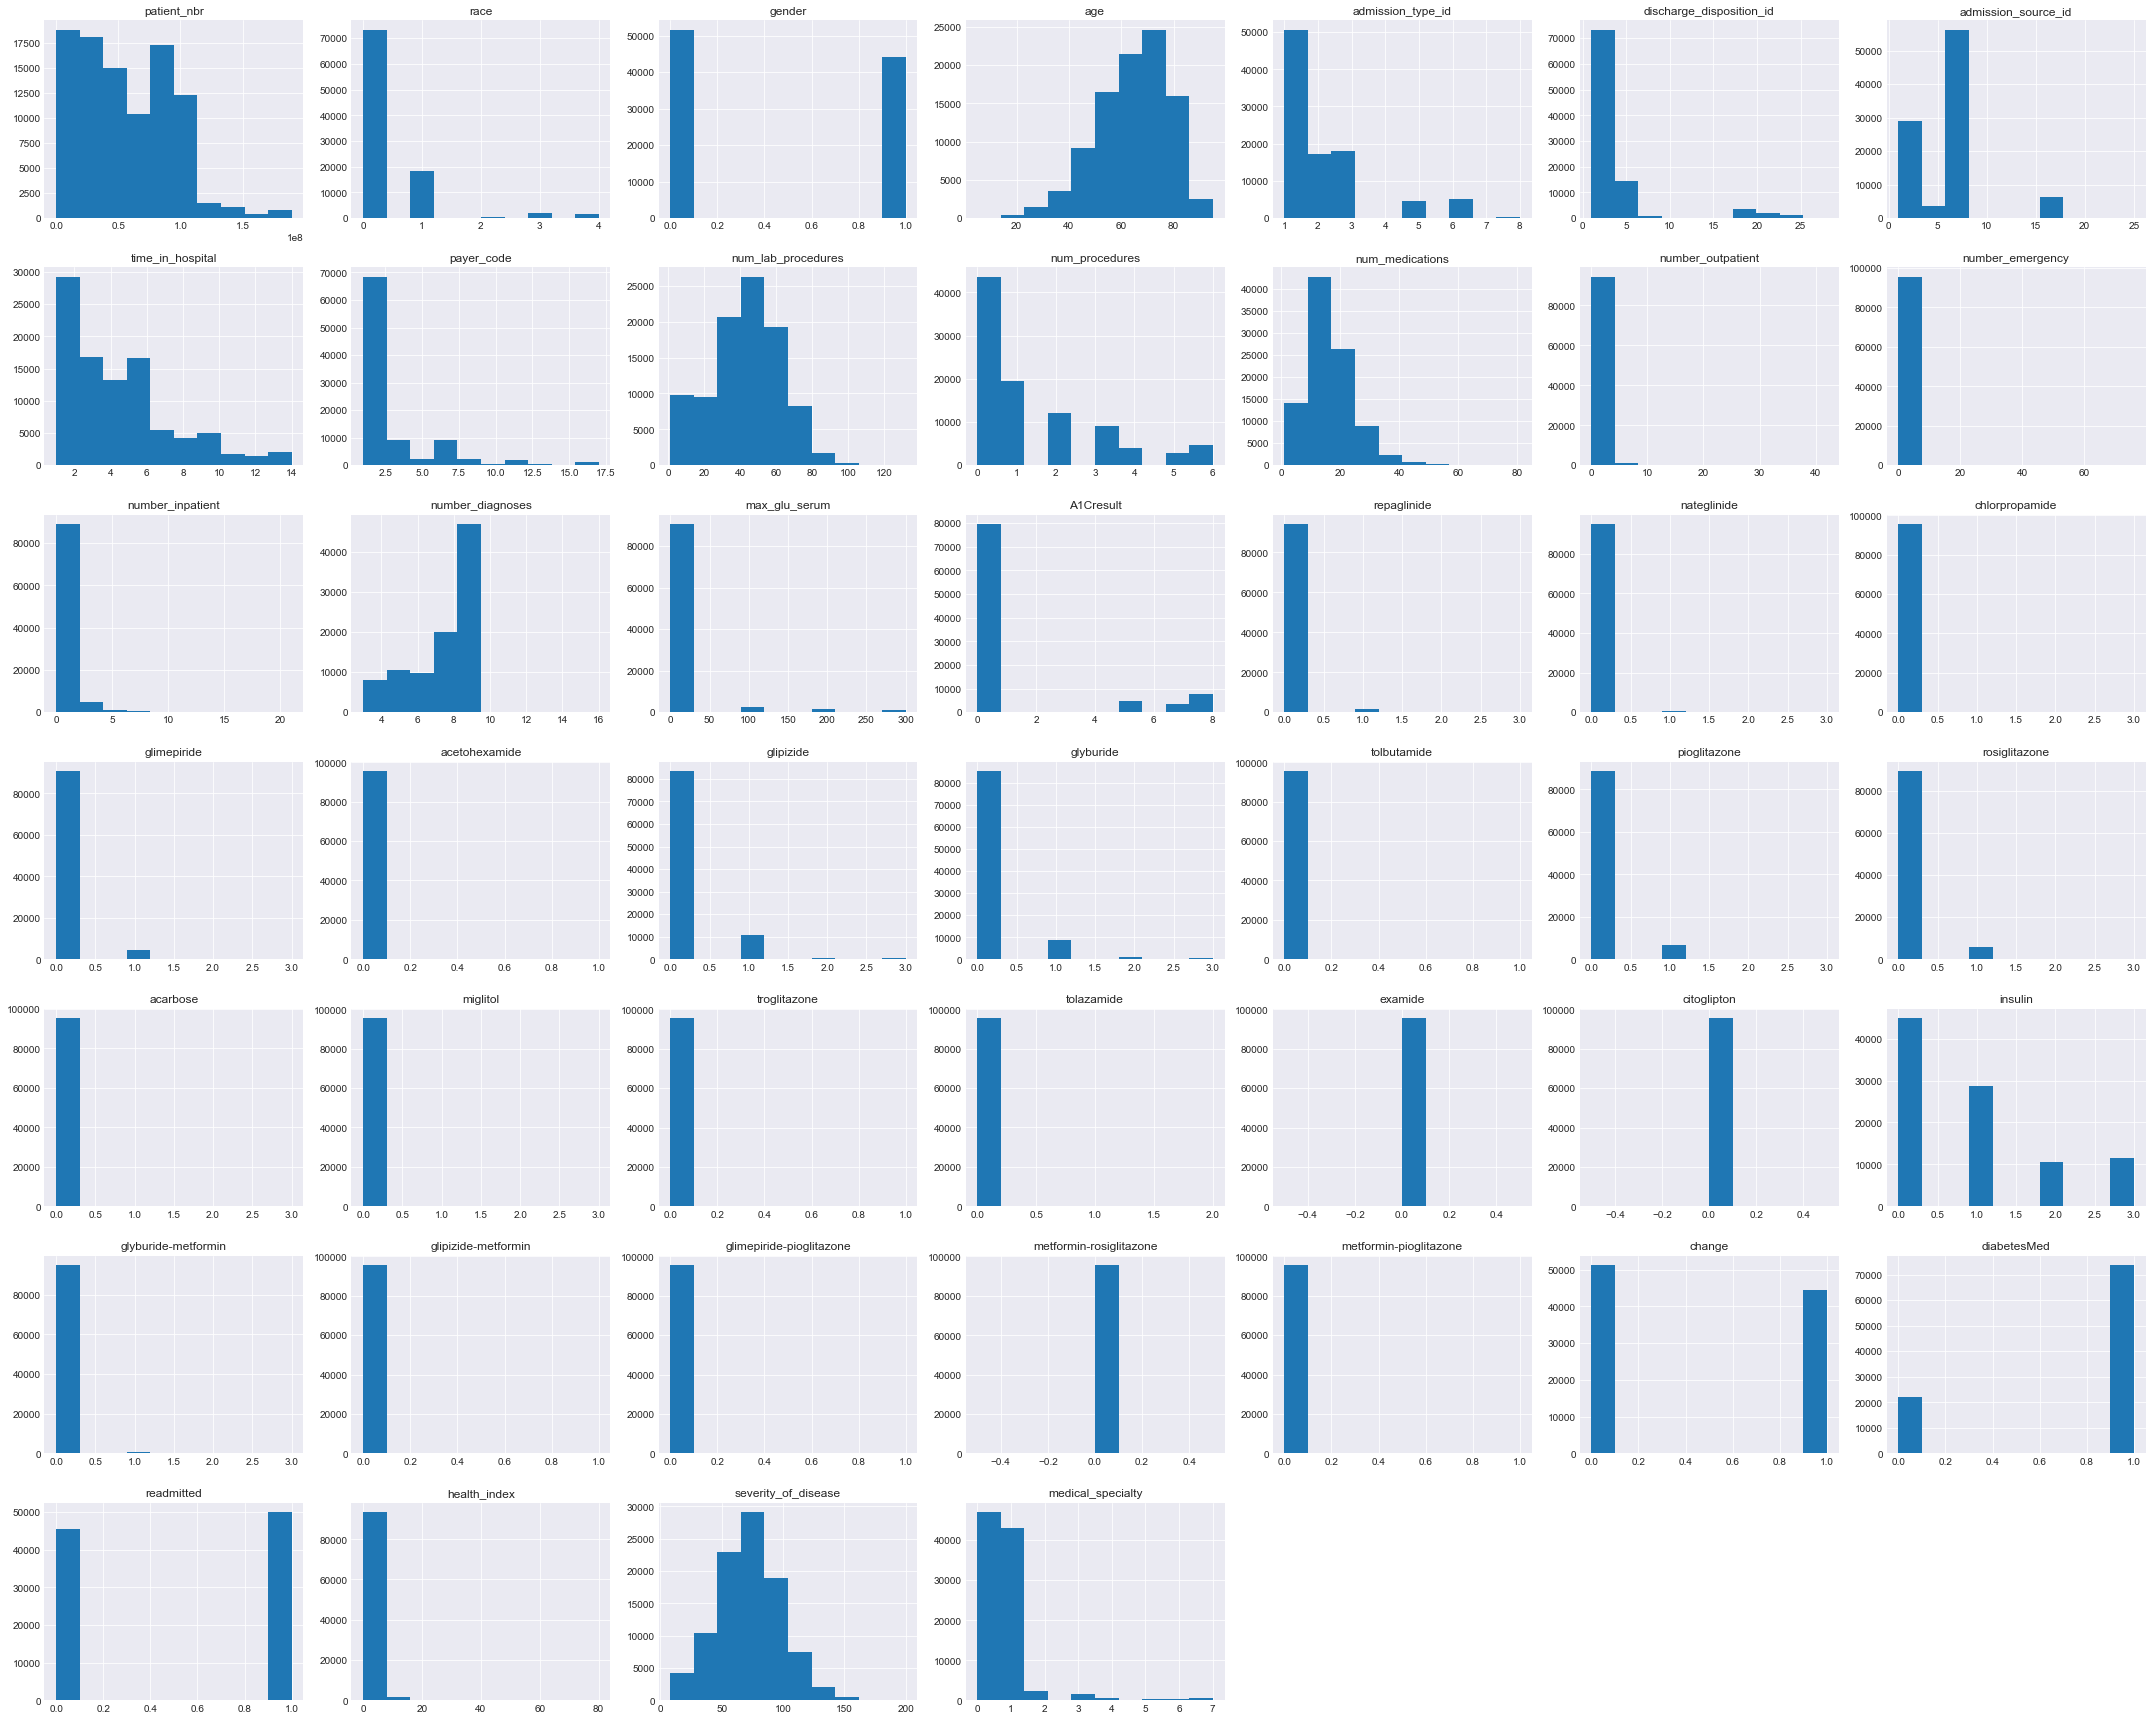

In [388]:
df_encoded.hist(figsize=(30,24))
plt.tight_layout()
plt.show()

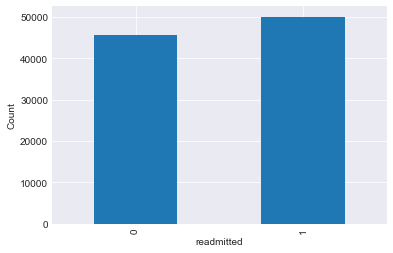

In [389]:
df_encoded.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

c:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  """


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

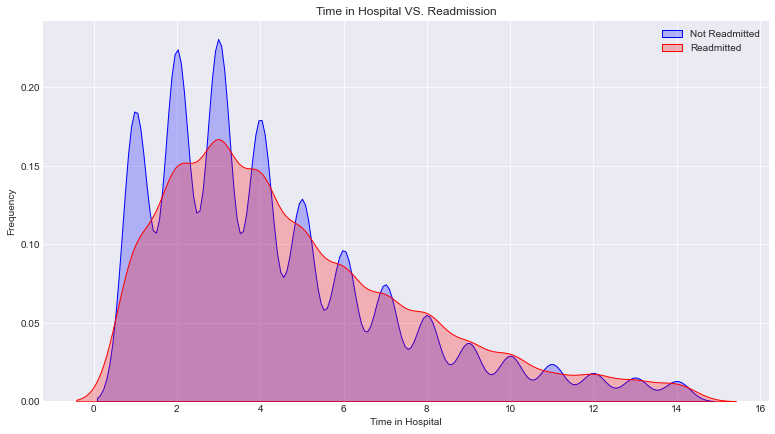

In [390]:
fig = plt.figure(figsize=(13, 7),)
ax = sns.kdeplot(df_encoded.loc[(rea == 0), 'time_in_hospital'],
                 color='b', shade=True, label='Not Readmitted')
ax = sns.kdeplot(df_encoded.loc[(rea == 1), 'time_in_hospital'],
                 color='r', shade=True, label='Readmitted')


ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.legend()
plt.title('Time in Hospital VS. Readmission')


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

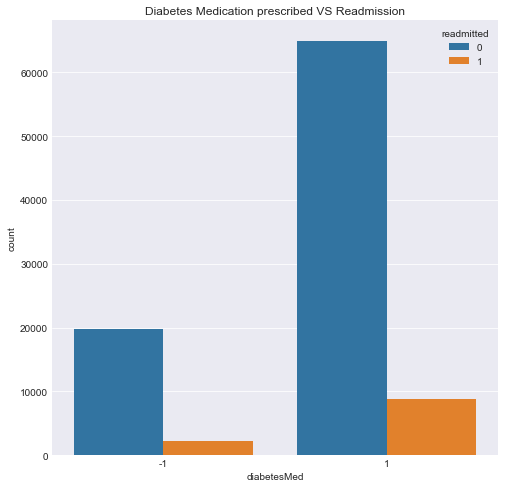

In [391]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['diabetesMed'], hue = rea).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

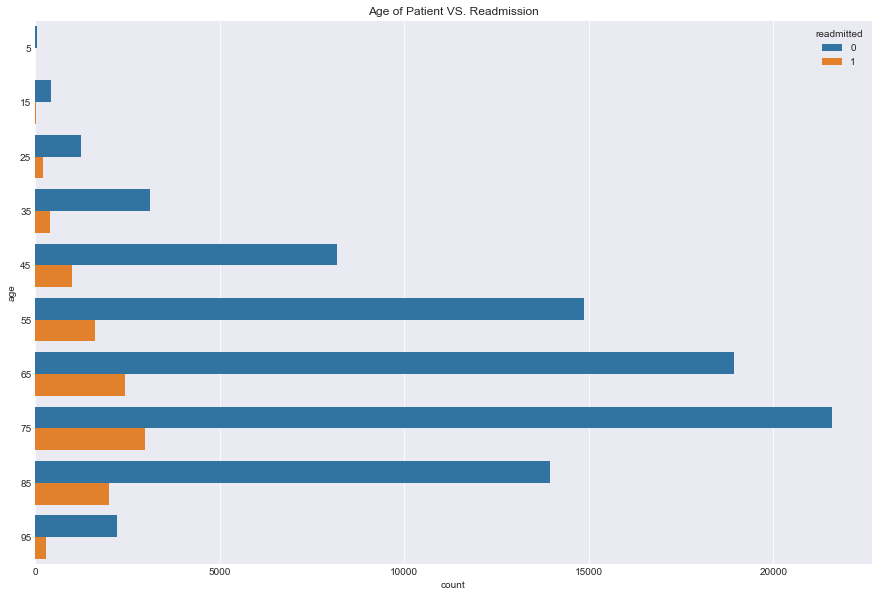

In [392]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = rea).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

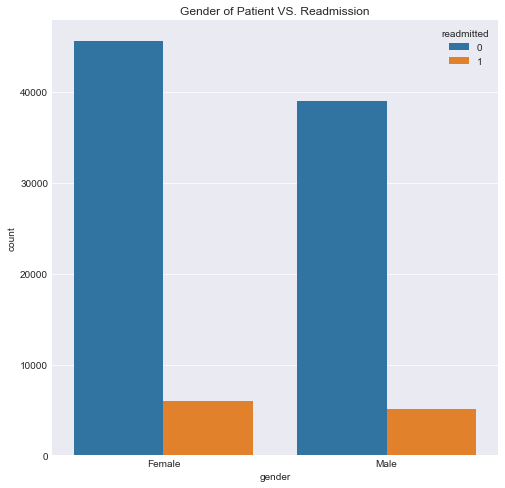

In [393]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['gender'], hue = rea).set_title("Gender of Patient VS. Readmission")

,age,race,gender,readmitted
1,15,0,0,0
2,25,1,0,1
3,35,0,1,1
4,45,0,1,1
5,55,0,1,0
...,...,...,...,...
101761,75,1,1,0
101762,85,1,0,1
101763,75,0,1,1
101764,85,0,0,1


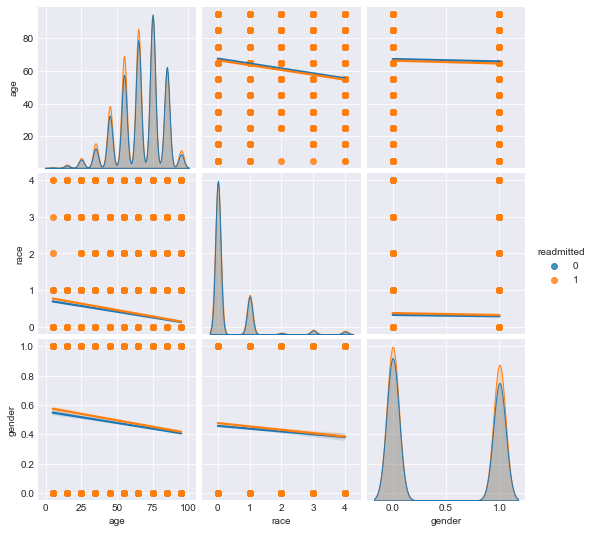

In [394]:
cols = ['age','race','gender','readmitted']
df_corr = df_encoded[cols]
sns.pairplot(df_corr,hue='readmitted',kind='reg')
df_corr

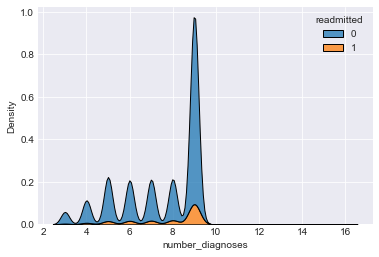

In [395]:
sns.kdeplot(data=df_encoded,x="number_diagnoses", hue=rea, multiple="stack")

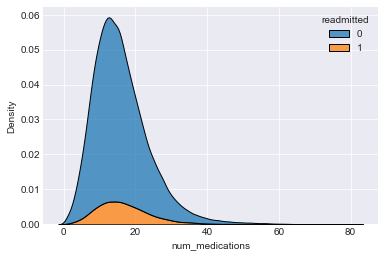

In [396]:
sns.kdeplot(data=df_encoded,x="num_medications", hue=rea, multiple="stack")

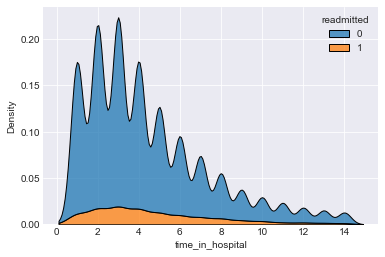

In [397]:
sns.kdeplot(data=df_encoded,x="time_in_hospital", hue=rea, multiple="stack")

c:\Users\alexa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  """Entry point for launching an IPython kernel.


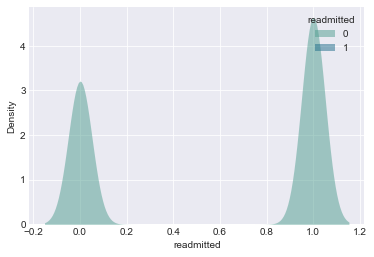

In [398]:
sns.kdeplot(data=df_encoded[['num_lab_procedures','num_procedures','num_medications','readmitted']],x='readmitted' ,hue=rea,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)

# Data Modelisation

In [399]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_val_score
#from sklearn import datasets, preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC, SVR
#from sklearn.metrics import classification_report


### Feature selection

Setting the independent & dependent variables

In [400]:
X = df_encoded.drop(['readmitted'], axis = 1)
y = df_encoded.readmitted

Splitting the data into train and test sets

In [401]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

In [402]:
X_train.metformin.unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

Performing a chi2 test to see which features seem to be the most important

In [403]:
from sklearn.feature_selection import chi2

from sklearn.preprocessing import LabelEncoder

# créez un objet LabelEncoder
encoder = LabelEncoder()

# transformez les données en utilisant l'objet encoder
X_train.metformin = encoder.fit_transform(X_train.metformin)
X_test.metformin = encoder.fit_transform(X_test.metformin)


# sélectionnez uniquement les colonnes qui ne sont pas 'diag_1', 'diag_2' ou 'diag_3'
temp_X_train = X_train.loc[:, ~X_train.columns.isin(['diag_1','diag_2', 'diag_3'])]

chi_values = chi2(temp_X_train, y_train)
chi_values

(array([1.03851897e+10, 1.10193797e+02, 8.28710076e+00, 3.29768371e+02,
        6.05396617e+00, 1.34338728e+02, 3.81213427e+02, 3.94228287e+02,
        2.10399438e+02, 1.19346486e+03, 2.43375098e+02, 6.24268769e+02,
        1.86698067e+03, 3.08357870e+03, 8.21241223e+03, 4.07112006e+02,
        6.63935044e+03, 1.17555827e+02, 1.39040388e+01, 3.26978373e+01,
        1.99566084e+00, 6.82010974e-02, 1.66043416e-01,            nan,
        2.39024747e+01, 3.28385532e+00, 3.97308009e+00, 4.71033088e+00,
        3.71258584e+00, 1.64277157e+01, 3.79378473e+00, 4.33357803e-03,
        1.60575009e+00,            nan,            nan, 3.64946906e+02,
        4.52877960e-05, 6.08931343e-01,            nan,            nan,
        9.11135209e-01, 6.55126760e+01, 5.79583852e+01, 1.26176588e+04,
        2.27439339e+03, 1.76560767e+02]),
 array([0.00000000e+000, 8.88642100e-026, 3.99276857e-003, 1.07953440e-073,
        1.38750964e-002, 4.60660099e-031, 6.77298544e-085, 9.94000372e-088,
        1.1238

The first array is for the F-score and the second for the p-values - We want high F-scores and low p-values

In [404]:
F_scores = pd.Series(chi_values[0])
p_values = pd.Series(chi_values[1])
F_scores.index = p_values.index = temp_X_train.columns

print("Features ranked by F_scores:\n", F_scores.sort_values(ascending = False))
print("\nFeatures ranked by p_values:\n",p_values.sort_values(ascending = True))


Features ranked by F_scores:
 patient_nbr                 1.038519e+10
health_index                1.261766e+04
number_inpatient            8.212412e+03
max_glu_serum               6.639350e+03
number_emergency            3.083579e+03
severity_of_disease         2.274393e+03
number_outpatient           1.866981e+03
num_lab_procedures          1.193465e+03
num_medications             6.242688e+02
number_diagnoses            4.071120e+02
time_in_hospital            3.942283e+02
admission_source_id         3.812134e+02
insulin                     3.649469e+02
age                         3.297684e+02
num_procedures              2.433751e+02
payer_code                  2.103994e+02
medical_specialty           1.765608e+02
discharge_disposition_id    1.343387e+02
A1Cresult                   1.175558e+02
race                        1.101938e+02
change                      6.551268e+01
diabetesMed                 5.795839e+01
repaglinide                 3.269784e+01
glipizide                  

The last feature selection technique we'll use is the mutual information gain. The higher its value, the more dependent the dependent feature will be the on the specific independent variable. 

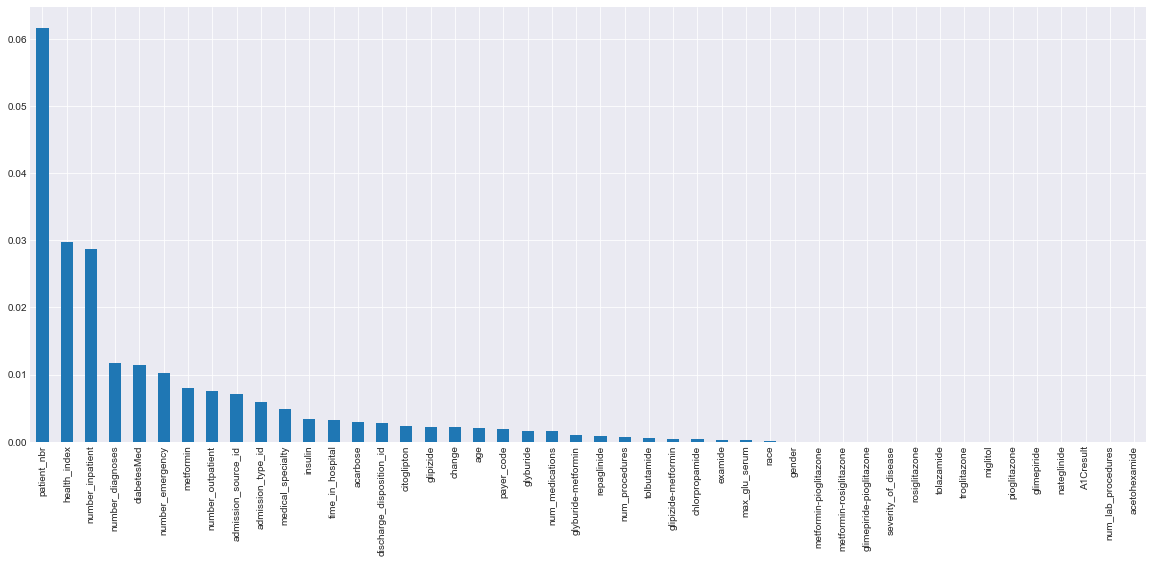

In [405]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(temp_X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = temp_X_train.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


Finally, we will find the best features using the K highest scores 

In [406]:
from sklearn.feature_selection import SelectKBest

bestFeatures = SelectKBest(mutual_info_classif, k=10)
bestFeatures.fit(temp_X_train, y_train)
temp_X_train.columns[bestFeatures.get_support()]

Index(['patient_nbr', 'admission_type_id', 'admission_source_id',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'diabetesMed', 'health_index'],
      dtype='object')

From all of our feature selection methods, we've judged these features were explaining the model the best:

- patient_nbr
- health_index
- admission_source_id
- number_inpatient
- number_diagnoses
- max_glu_serum
- discharge_disposition_id
- num_medications
- number_emergency
- patient_nbr
- number_emergency
- number_outpatient
- age
- gender
- race
- admission_type_id
- time_in_hospital
- num_lab_procedures
- num_procedures
- A1Cresult
- metformin
- insulin
- change
- diabetesMed

These have been chosen from feature selection algorithms but also from background knowledge around diabetes treatment
We'll also use the first diagnosis feature (which we removed for the feature selection analysis because of its non-integer values)

Now that we have proceeded with the feature selection, let's apply our result on our dataset. This will not only make processing the model faster, it will also give us more accurate results.

### K fold cross val:

In [407]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
folds = KFold(n_splits=5, shuffle=True, random_state=100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores

hyper_params = [{'n_features_to_select': list(range(1, 49))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator=rfe,
                        param_grid=hyper_params,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

plt.figure(figsize=(16, 6))

plt.plot(cv_results["param_n_features_to_select"],
         cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"],
         cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

c:\Users\alexa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alexa\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 663, in fit
    X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
  File "c:\Users\alexa\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)


ValueError: could not convert string to float: 'V57'

In [408]:
if(featuresSelection):
    X_train = X_train[['patient_nbr','health_index','admission_source_id', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'discharge_disposition_id', 'num_medications', 
                   'number_emergency', 'number_outpatient', 'age', 'gender', 'race','admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed']]
    X_test = X_test[['patient_nbr','health_index', 'admission_source_id', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'discharge_disposition_id', 'num_medications', 
                 'number_emergency', 'number_outpatient', 'age', 'gender', 'race','admission_type_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'A1Cresult', 'metformin', 'insulin', 'change', 'diabetesMed']]
else:
    X_train = df_encoded
    X_train.drop(columns = ['readmitted'])
    Y_train = df_encoded['readmitted']



# Now that our data is preprocesed, we can create a Model with the scikitlearn library

In [426]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier

# Construire le modèle de gradient boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

# Entraîner le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = model.score(X_test, y_test)

print(accuracy)

0.6426729844610132


<Figure size 1152x432 with 0 Axes>

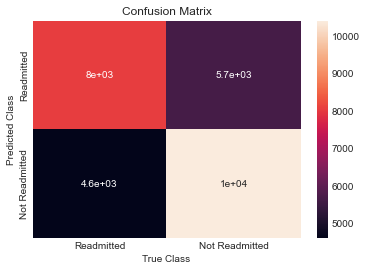

<Figure size 1152x432 with 0 Axes>

In [429]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, yticklabels=['Readmitted', 'Not Readmitted'], xticklabels=['Readmitted', 'Not Readmitted'])

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel("Predicted Class")


In [410]:
'''
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1,10]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())
'''

'\ngbc = GradientBoostingClassifier()\nparameters = {\n    "n_estimators":[5,50,250],\n    "max_depth":[1,3,5,7],\n    "learning_rate":[0.01,0.1,1,10]\n}\nfrom sklearn.model_selection import GridSearchCV\ncv = GridSearchCV(gbc,parameters,cv=5)\ncv.fit(X_train,y_train.values.ravel())\n'

In [411]:
'''
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)
'''

'\ndef display(results):\n    print(f\'Best parameters are: {results.best_params_}\')\n    print("\n")\n    mean_score = results.cv_results_[\'mean_test_score\']\n    std_score = results.cv_results_[\'std_test_score\']\n    params = results.cv_results_[\'params\']\n    for mean,std,params in zip(mean_score,std_score,params):\n        print(f\'{round(mean,3)} + or -{round(std,3)} for the {params}\')\ndisplay(cv)\n'

In [412]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
display(grid_result)
'''

"\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import RepeatedStratifiedKFold\n\n# define models and parameters\nlr = LogisticRegression()\nsolvers = ['newton-cg', 'lbfgs', 'liblinear']\npenalty = ['l2']\nc_values = [100, 10, 1.0, 0.1, 0.01]\n# define grid search\ngrid = dict(solver=solvers,penalty=penalty,C=c_values)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ngrid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)\ngrid_result = grid_search.fit(X_train, y_train)\n# summarize results\ndisplay(grid_result)\n"

In [413]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression( fit_intercept=True,penalty='l2')
logit.fit(X_train, y_train)
logit.predict(X_test)
accuracy = logit.score(X_test, y_test)
accuracy

0.4773534945299979

In [415]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

ypred = model.predict(X_test)


accuracy = model.score(X_test, y_test)
accuracy

0.6274824054072887

In [416]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))


accuracy_dtree = accuracy_score(y_test, dtree_pred)


Accuracy is 0.56


In [417]:
from sklearn.neighbors import KNeighborsClassifier




model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)

ypred = model.predict(X_test)
print("\n\nK-Nearest Neighbor Accuracy Score:", model.score(X_test, y_test), "%")



K-Nearest Neighbor Accuracy Score: 0.5702390077346526 %


In [418]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(n_estimators=100,random_state=0)

model.fit(X_train, y_train)

ypred = model.predict(X_test)


print("\n\nBagging Accuracy Score:", model.score(X_test, y_test), "%")



Bagging Accuracy Score: 0.6252525956379347 %


In [419]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train, y_train)


preds = clf.predict(X_test)


print("Accuracy Score:  ", accuracy_score(y_test,preds ))

Accuracy Score:   0.47822451397115184


### Summary of the different models

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

classification_models = [SVC, LogisticRegression, GaussianNB, MultinomialNB,
                         SGDClassifier, KNeighborsClassifier, DecisionTreeClassifier,
                         RandomForestClassifier, GradientBoostingClassifier]

classification_models_names = ["SVC", "LogisticRegression", "GaussianNB", "MultinomialNB",
                               "SGDClassifier", "KNeighborsClassifier", "DecisionTreeClassifier",
                               "RandomForestClassifier", "GradientBoostingClassifier"]

counter = 0
for mod in classification_models:
    model = mod()
    model.fit(X_train, y_train)

    print(classification_models_names[counter])

    train_predictions = model.predict(X_train)
    print("Accuracy score on training data:",
          accuracy_score(y_train, train_predictions))

    test_predictions = model.predict(X_test)
    print("Accuracy score on test data:", accuracy_score(
        y_test, test_predictions), "\n")  # Same as model.score function

    counter = counter + 1

SVC
Accuracy score on training data: 0.56416305808571
Accuracy score on test data: 0.5600306598843287 

LogisticRegression
Accuracy score on training data: 0.4767507839331044
Accuracy score on test data: 0.4773534945299979 

GaussianNB
Accuracy score on training data: 0.5578169329550545
Accuracy score on test data: 0.5547348616821127 

MultinomialNB
Accuracy score on training data: 0.5587576526803046
Accuracy score on test data: 0.5511114208069124 

SGDClassifier
Accuracy score on training data: 0.4767507839331044
Accuracy score on test data: 0.4773534945299979 

KNeighborsClassifier
Accuracy score on training data: 0.7215320292668359
Accuracy score on test data: 0.5719113650616682 

DecisionTreeClassifier
Accuracy score on training data: 1.0
Accuracy score on test data: 0.5546651801268204 

RandomForestClassifier
Accuracy score on training data: 1.0
Accuracy score on test data: 0.6303393491742736 

GradientBoostingClassifier
Accuracy score on training data: 0.6416156487979693
Accuracy

In [423]:
#importer pickle
import pickle


pickle.dump(model, open('model.pkl','wb'))

In [422]:
model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

c:\Users\alexa\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int64)